# **Context** 

Forbes is a media and publishing company based in the United States that is controlled by Integrated Whale Media Investments and the Forbes family. It is well-known for its magazine and rankings of billionaires and sports teams.
As a newly hired Data Scientist of Forbes company, you have been given the task of analyzing the net worth of Forbes Top Billionaires 2020. Your goal is to analyze the data and draw insights.

## **Problem Statement**

Analyze the net worth of Forbes Top Billionaires 2020.

**Data Dictionary**

Name - Name of the person
<br>
Net worth in billions - Net worth of the person in billions
<br>
Country - Country where the person is from
<br>
Source - Source of the income
<br>
Rank - Rank of the person in the Billionaires list
<br>
Age - Age of the person
<br>
Industry - Industry to which the person is related to

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

Matplotlib is building the font cache; this may take a moment.


## Loading dataset and understanding it

In [5]:
df = pd.read_csv('Forbes+Billionaire+2020.csv')

### Looking at top 5 rows 

In [6]:
df.head()

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology


### Dimension of Data

In [7]:
df.shape

(2755, 7)

### The Datatypes of the columns in the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


### Checking for missing values

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.isnull().sum()

Name                    0
NetWorth in billions    0
Country                 0
Source                  0
Rank                    0
Age                     0
Industry                0
dtype: int64

### Plots & Its use

#### Boxplot - helps in checking for Outliers

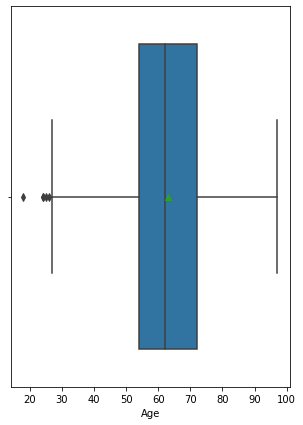

In [11]:
plt.figure(figsize=(5,7))
sns.boxplot(x = 'Age', data = df, showmeans=True)
plt.show() 

## Data Analysis

### Summary of data

In [12]:
df[['NetWorth in billions','Age']].describe()

,NetWorth in billions,Age
count,2755.000000,2755.000000
mean,4.749220,63.014519
std,9.615358,13.259017
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,62.000000
75%,4.200000,72.000000
max,177.000000,97.000000


#### Distribution of Age variable

#### distplot

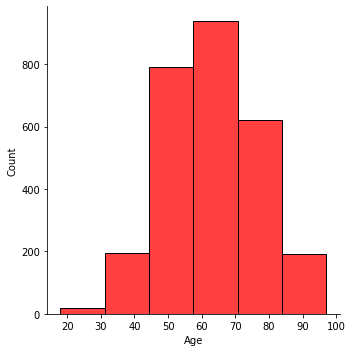

In [13]:
sns.displot(df["Age"],kde = False, color = 'red',bins=6)
plt.show()

#### Which 5 countries have the maximum billiionaries?

In [14]:
df.Country.value_counts().head()

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

#### Which countries do the 5 youngest billionaires belong to?

In [15]:
df.sort_values(by = 'Age').head(10)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18,Fashion & Retail
2143,Alexandra Andresen,1.4,Norway,investments,2141,24,Diversified
2122,Wang Zelong,1.5,China,chemicals,2035,24,Metals & Mining
2144,Katharina Andresen,1.4,Norway,investments,2141,25,Diversified
1338,Austin Russell,2.4,United States,Unknown,1299,26,Automotive
661,Gustav Magnar Witzoe,4.4,Norway,fish farming,655,27,Food & Beverage
1596,Andy Fang,2.0,United States,food delivery app,1580,28,Technology
1645,Stanley Tang,2.0,United States,food delivery app,1580,28,Technology
274,Sam Bankman-Fried,8.7,United States,cryptocurrency,274,29,Finance & Investments
1328,Jonathan Kwok,2.4,Hong Kong,Real Estate,1299,29,Real Estate


In [16]:
df.sort_values(by = 'Age').head(5)['Country'].unique()

array(['Germany', 'Norway', 'China', 'United States'], dtype=object)

#### Countplot for industry

C:\Users\Administrator\anaconda3\envs\mit_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


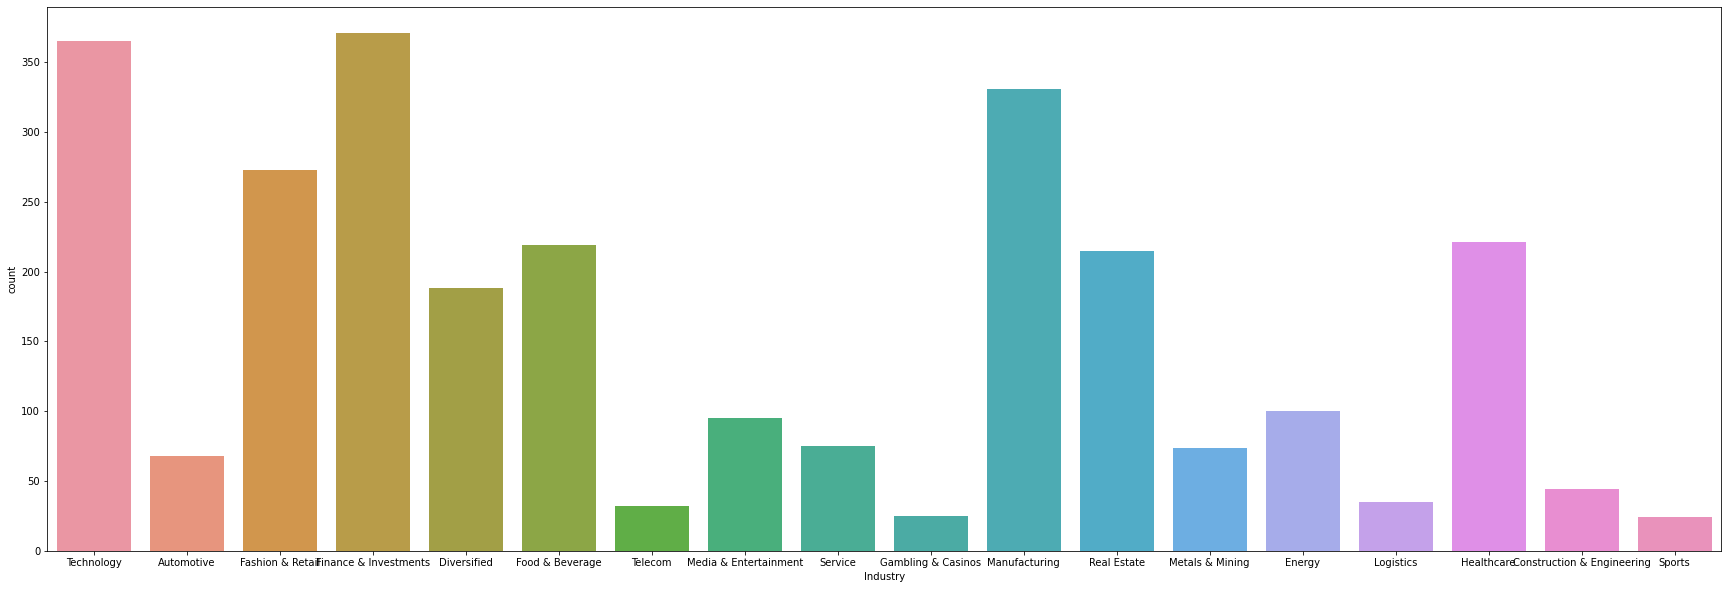

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(df['Industry'])
plt.show()

In [18]:
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

#### Name all the billionaires in India who are younger than 50 years. 

In [19]:
Indian_billionaires = df[df['Country']=='India']
Indian_billionaires

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
9,Mukesh Ambani,84.5,India,diversified,10,63,Diversified
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58,Diversified
71,Shiv Nadar,23.5,India,software services,71,75,Technology
116,Radhakishan Damani,16.5,India,"retail, investments",117,66,Fashion & Retail
122,Uday Kotak,15.9,India,banking,121,62,Finance & Investments
...,...,...,...,...,...,...,...
2683,Ramesh Kumar Dua,1.0,India,footwear,2674,67,Fashion & Retail
2698,Ashok Kajaria,1.0,India,tiles,2674,73,Manufacturing
2699,T.S. Kalyanaraman,1.0,India,jewelry,2674,73,Fashion & Retail
2712,Rafique Malik,1.0,India,footwear,2674,70,Fashion & Retail


In [20]:
print('The names of the Indian Billionaires under the age of 50 are:')
Indian_billionaires[Indian_billionaires['Age']<50]['Name'].values

The names of the Indian Billionaires under the age of 50 are:


array(['Byju Raveendran and Divya Gokulnath', 'Vijay Shekhar Sharma',
       'Acharya Balkrishna', 'Radha Vembu', 'Ranjan Pai', 'Sachin Bansal',
       'Binny Bansal', 'Sekar Vembu'], dtype=object)

#### Pieplot

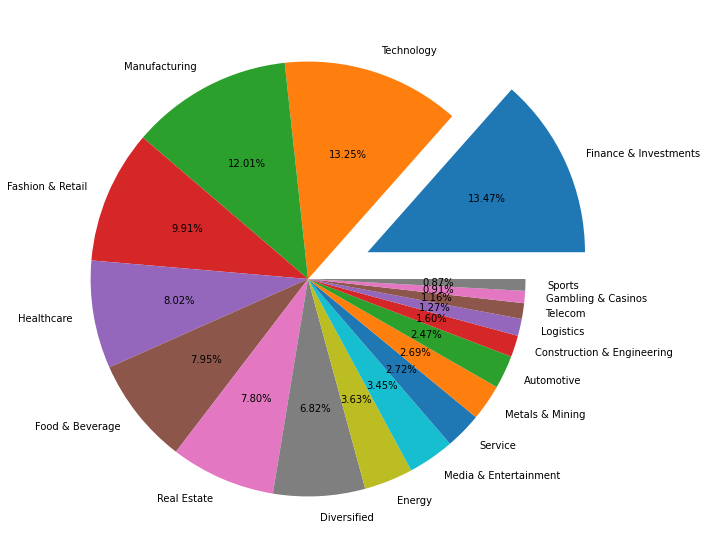

In [21]:
plt.figure(figsize=(11,10))
plt.pie(df["Industry"].value_counts(), labels=df["Industry"].value_counts().index, autopct='%.2f%%', 
        explode = (0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
# autopct="%.2f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode is used here to take the 'Finance & Investment'(30%) of the pie-chart
plt.show()

#### To check the age distribution by Industry

#### Use boxplot

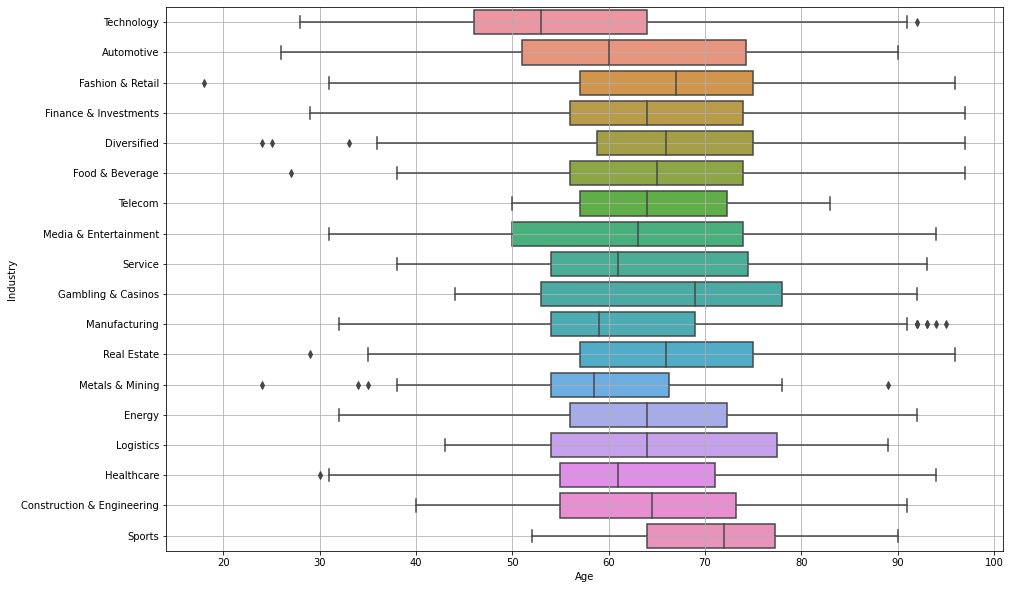

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x= 'Age', y='Industry', data=df)
plt.grid()
plt.show()

#### Use Strip Plot

Plot a strip plot to check the relationship between the variables 'Industry' and 'Age'.

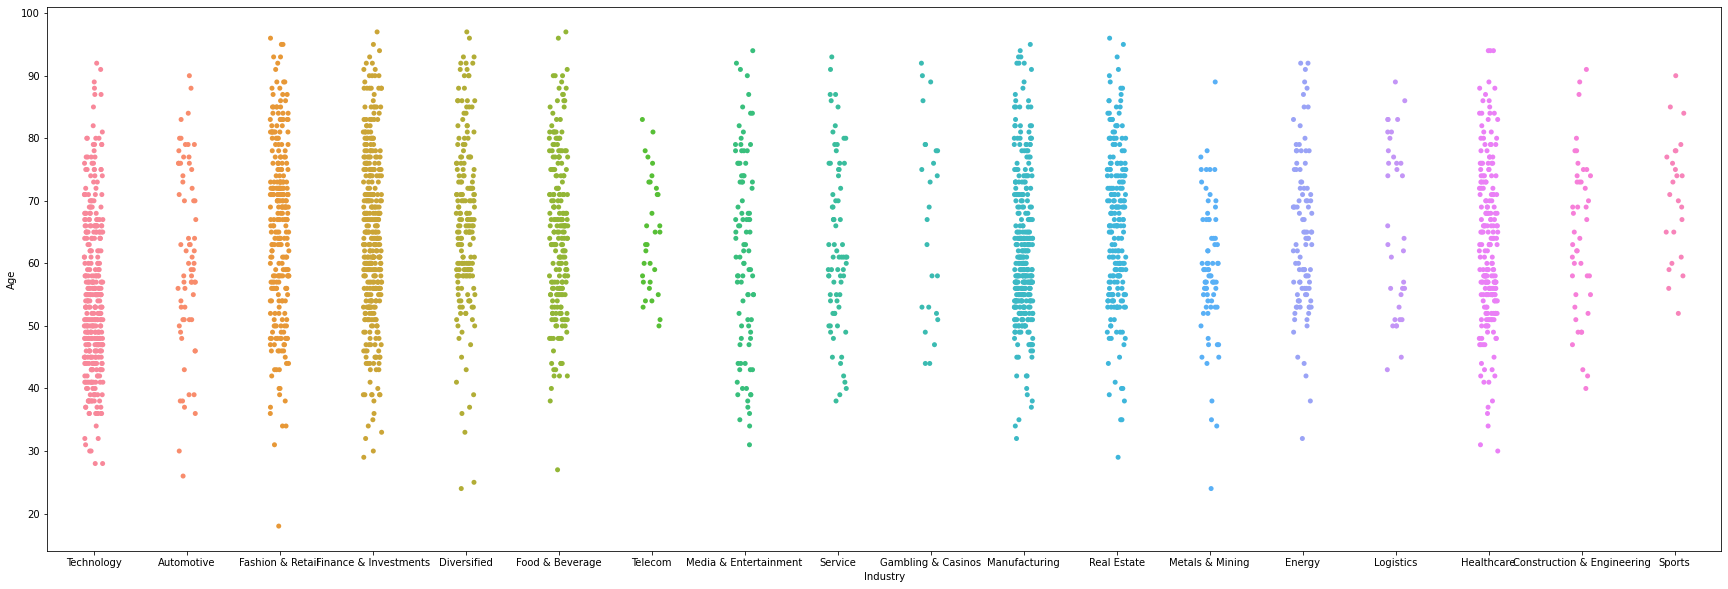

In [23]:
# strip plot
plt.figure(figsize=(30,10))
sns.stripplot(x = 'Industry', y = 'Age', data = df)

# display the plot
plt.show()

#### Scatterplot

<Figure size 576x576 with 0 Axes>

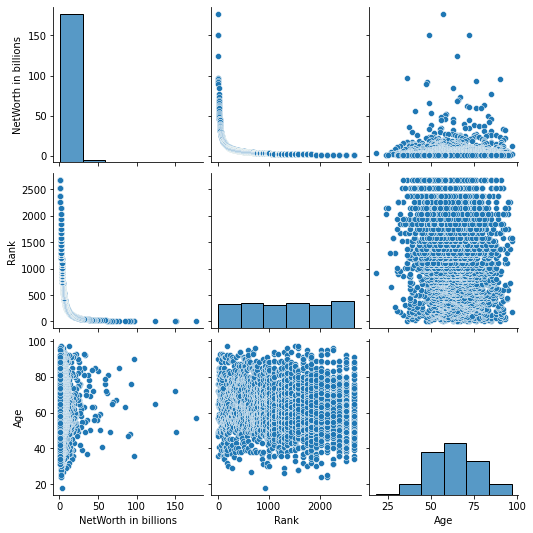

In [24]:
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(data=df,diag_kws={'bins':6})

# display the plot
plt.show()

In [25]:
df.columns

Index(['Name', 'NetWorth in billions', 'Country', 'Source', 'Rank', 'Age',
       'Industry'],
      dtype='object')

#### Heatmap

In [26]:
# compute correlation
corr_matrix = df.corr()

corr_matrix

,NetWorth in billions,Rank,Age
NetWorth in billions,1.000000,-0.475346,0.035225
Rank,-0.475346,1.000000,-0.104220
Age,0.035225,-0.104220,1.000000


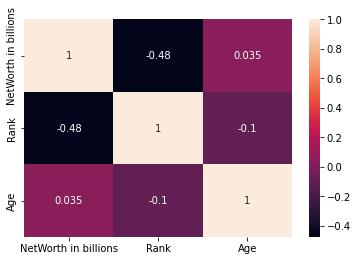

In [27]:
# plot heatmap
# 'annot=True' returns the correlation values 
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

## Happy Learning!